# 室外油数据分析

In [34]:
import glob, os
import pickle
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


folder = 'D:\\Atom\\python\\data\\cleaned\\outdoor'
front = pd.read_csv(os.path.join(folder, 'outdoor_oil_kde.csv'))
tail = pd.read_csv(os.path.join(folder, 'outdoor_oil_tail_kde.csv'))
     
with open('features.txt', 'rb') as f:
    features = pickle.load(f)

In [38]:
ds = sorted(list(set(front['DISTANCE'].unique()) & set(tail['DISTANCE'].unique())))
ds

[55, 75, 85, 95, 105, 115, 125, 135]

55 50 50
75 50 50
85 50 50
95 50 50
105 50 50
115 50 50
125 50 50
135 50 50


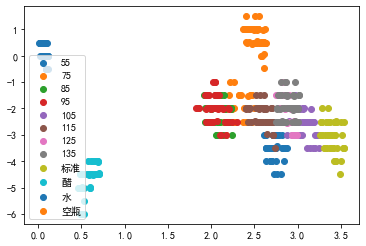

In [42]:
df_f_g = front.groupby('DISTANCE')
df_t_g = tail.groupby('DISTANCE')

for d in ds:
    df_h = df_f_g.get_group(d)
    df_t = df_t_g.get_group(d)
    
    df_h = df_h.set_index('CHANNEL')
    df_t = df_t.set_index('CHANNEL')
    
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
#     rssi_diff = df_h['RSSI'].values - df_t['RSSI'].values
    rssi_diff = df_h['RSSI'] - df_t['RSSI']
    phase_diff[phase_diff < 0] += 2*np.pi
    print(d, len(phase_diff), len(rssi_diff))
    plt.scatter(phase_diff, rssi_diff)

plt.scatter(features['oil'][0], features['oil'][1])
plt.scatter(features['vinegar'][0], features['vinegar'][1])
plt.scatter(features['water'][0], features['water'][1])
plt.scatter(features['empty'][0], features['empty'][1])
plt.legend(ds + ['标准', '醋', '水', '空瓶'])

In [19]:
df_h.set_index('CHANNEL')

,DISTANCE,RSSI,PHASE
CHANNEL,,,
902.75,135,-62.497487,3.204062
903.25,135,-62.500000,3.083008
903.75,135,-62.000000,2.908551
904.25,135,-62.000000,2.695089
904.75,135,-62.000000,2.526859
905.25,135,-62.484925,2.413360
905.75,135,-62.502513,2.271710
906.25,135,-62.040201,2.104961
906.75,135,-61.997487,1.961738


In [21]:

    df_t.set_index('CHANNEL')

,DISTANCE,RSSI,PHASE
CHANNEL,,,
902.75,135,-60.497487,0.308739
903.25,135,-60.500000,0.118710
903.75,135,-60.500000,6.245506
904.25,135,-60.492462,6.094760
904.75,135,-60.000000,5.932359
905.25,135,-60.000000,5.724940
905.75,135,-60.005025,5.586064
906.25,135,-60.010050,5.413580
906.75,135,-60.000000,5.264375


In [23]:
df_h['RSSI']

400   -62.497487
401   -62.500000
402   -62.000000
403   -62.000000
404   -62.000000
405   -62.484925
406   -62.502513
407   -62.040201
408   -61.997487
409   -61.997487
410   -62.057789
411   -62.500000
412   -62.002513
413   -62.000000
414   -61.997487
415   -62.000000
416   -62.005025
417   -62.000000
418   -61.500000
419   -61.492462
420   -61.517588
421   -61.527638
422   -61.005025
423   -61.000000
424   -60.997487
425   -60.997487
426   -60.500000
427   -60.500000
428   -60.494975
429   -60.500000
430   -60.500000
431   -60.000000
432   -60.000000
433   -60.497487
434   -60.500000
435   -60.000000
436   -60.000000
437   -60.002513
438   -60.494975
439   -60.500000
440   -60.492462
441   -59.994975
442   -59.997487
443   -60.002513
444   -60.000000
445   -59.500000
446   -59.005025
447   -59.500000
448   -59.500000
449   -59.002513
Name: RSSI, dtype: float64

In [27]:
df_h

,DISTANCE,CHANNEL,RSSI,PHASE
200,95,902.75,-58.500000,4.916539
201,95,903.25,-58.494975,4.705544
202,95,903.75,-58.005025,4.527818
203,95,904.25,-58.000000,4.363412
204,95,904.75,-58.000000,4.205173
205,95,905.25,-58.002513,4.060285
206,95,905.75,-58.500000,3.898223
207,95,906.25,-58.000000,3.682787
208,95,906.75,-58.000000,3.543819
209,95,907.25,-58.000000,3.422797
